# Identifiability and Backdoor Adjustment Formula

This notebook explores identifiability via the IdentifiabiltyChecker, for the simple triangle graph
with nodes X, Y, Z and arrows X->Y and X<-Z->Y.

We verify that the Backdoor Adjustmen Formula is satisfied.

In [1]:
# this makes sure it starts looking for things from the JudeasRx folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\JudeasRx


In [2]:
from DoX_BayesNet import *
from graphs.BayesNet import *
from nodes.BayesNode import *
from IdentifiabilityChecker import *
from Plotter_nz import *
import imp
from pprint import pprint
%matplotlib inline

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
# pots of in_bnet will be selected at random
import random
random.seed(871)

## Building in_bnet

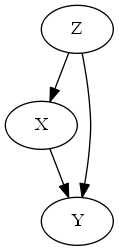

Y, parents=['X', 'Z'], children=[]
['Z', 'X', 'Y']
[[[0.273 0.727]
  [0.089 0.911]]

 [[0.419 0.581]
  [0.997 0.003]]]

X, parents=['Z'], children=['Y']
['Z', 'X']
[[0.858 0.142]
 [0.397 0.603]]

Z, parents=[], children=['X', 'Y']
['Z']
[0.395 0.605]




In [4]:
def build_in_bnet(draw):
    nd_X = BayesNode(0, name="X")
    nd_Y = BayesNode(1, name="Y")
    nd_Z = BayesNode(2, name="Z")

    nd_Y.add_parents({nd_X, nd_Z})
    nd_X.add_parents({nd_Z})

    nodes = {nd_X, nd_Y, nd_Z}
    in_bnet = BayesNet(nodes)

    # in general
    # DiscreteCondPot(False, [y1, y2, y3, x]) refers to P(x| y1, y2, y3)
    nd_Z.potential = DiscreteUniPot(False, nd_Z)  # P(a)
    nd_X.potential = DiscreteCondPot(False, [nd_Z, nd_X])  # P(b| a)
    nd_Y.potential = DiscreteCondPot(False, [nd_Z, nd_X, nd_Y])
    for nd in nodes:
        nd.potential.set_to_random()
        nd.potential.normalize_self()
    if draw:
        in_bnet.gv_draw()
    return in_bnet

    
in_bnet = build_in_bnet(True)
print(in_bnet)

## Backdoor Adjustment Formula
$$P(y|do(X)=x) = \sum_z P(y|x,z)P(z)$$

In [5]:
nd_Z = in_bnet.get_node_named("Z")
nd_Y = in_bnet.get_node_named("Y")
nd_X = in_bnet.get_node_named("X")
pot_YZbX = nd_Y.potential*nd_Z.potential
pot_YbX = pot_YZbX.get_new_marginal([nd_X, nd_Y])
pot_YbX.set_to_transpose([nd_X, nd_Y])
def print_bdoor_prediction():
    print("Backdoor Adjustment Formula prediction for query P(y|do(x))=")
    print("(x is row index, y is column index)")
    print(pot_YbX.pot_arr)

## Building doX bnet

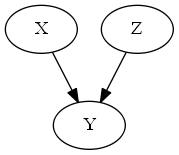

Y, parents=['X', 'Z'], children=[]
['Z', 'X', 'Y']
[[[0.273 0.727]
  [0.089 0.911]]

 [[0.419 0.581]
  [0.997 0.003]]]

X, parents=[], children=['Y']
['X']
[1.000 0.000]

Z, parents=[], children=['Y']
['Z']
[0.395 0.605]




In [6]:
trol_list = []
unobs_nd_list = []
doX_bnet = DoX_BayesNet(in_bnet,
                        trol_list,
                        unobs_nd_list,
                        x_val=0)
doX_bnet.gv_draw()
print(doX_bnet)

## Node Z is control, no unobserved nodes

************************************************
world:
0, 1, 2
x_value= 0
control nodes: ['Z']
control coords to query bounds (low, high):
{(0,): array([0.726, 0.729]), (1,): array([0.579, 0.580])}
control coords to query statistics (mu, sigma):
{(0,): array([0.727, 0.001]), (1,): array([0.580, 0.001])}


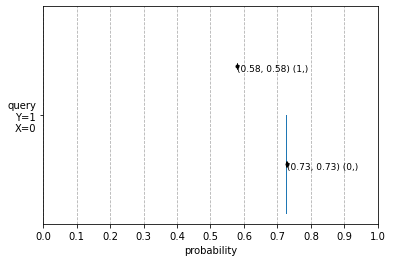

************************************************
world:
0, 1, 2
x_value= 1
control nodes: ['Z']
control coords to query bounds (low, high):
{(0,): array([0.909, 0.911]), (1,): array([0.003, 0.003])}
control coords to query statistics (mu, sigma):
{(0,): array([9.102e-01, 7.018e-04]), (1,): array([2.800e-03, 8.944e-05])}


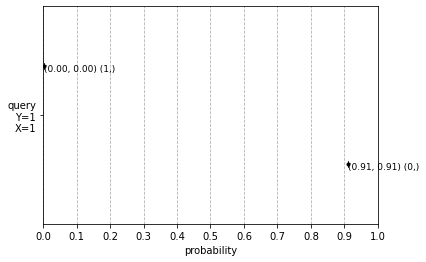

In [7]:
nd_Z = in_bnet.get_node_named("Z")
trol_list = [nd_Z]
unobs_nd_list = []
doX_bnet.set_trol_and_unobs_nodes(trol_list, unobs_nd_list)
checker = IdentifiabilityChecker(doX_bnet,
                          num_1world_samples=50000,
                          num_worlds=3)
for x_val in [0,1]:
    print("************************************************")
    doX_bnet.reset_x_val(x_val)
    checker.set_query_bds_and_stats()
    checker.print_query_bds_and_stats()
    Plotter_nz.plot_query_bds(doX_bnet.x_val,
        checker.get_query_bds(),
        zname_to_query_stats=checker.get_query_stats(),
        horizontal=True)

## Node Z is unobserved, no control nodes

************************************************
world:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9
10, 11, 12, 13, 14, 15, 16, 17, 18, 19
20, 21, 22, 23, 24, 25, 26, 27, 28, 29
30, 31, 32, 33, 34, 35, 36, 37, 38, 39
40, 41, 42, 43, 44, 45, 46, 47, 48, 49
50, 51, 52, 53, 54, 55, 56, 57, 58, 59
60, 61, 62, 63, 64, 65, 66, 67, 68, 69
70, 71, 72, 73, 74, 75, 76, 77, 78, 79
80, 81, 82, 83, 84, 85, 86, 87, 88, 89
90, 91, 92, 93, 94, 95, 96, 97, 98, 99
x_value= 0
control nodes: []
control coords to query bounds (low, high):
{(): array([0.577, 0.721])}
control coords to query statistics (mu, sigma):
{(): array([0.656, 0.035])}


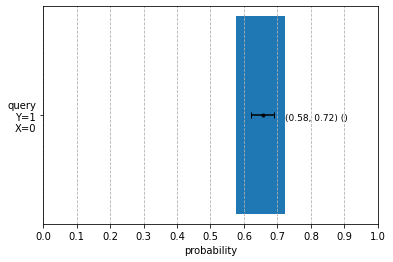

************************************************
world:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9
10, 11, 12, 13, 14, 15, 16, 17, 18, 19
20, 21, 22, 23, 24, 25, 26, 27, 28, 29
30, 31, 32, 33, 34, 35, 36, 37, 38, 39
40, 41, 42, 43, 44, 45, 46, 47, 48, 49
50, 51, 52, 53, 54, 55, 56, 57, 58, 59
60, 61, 62, 63, 64, 65, 66, 67, 68, 69
70, 71, 72, 73, 74, 75, 76, 77, 78, 79
80, 81, 82, 83, 84, 85, 86, 87, 88, 89
90, 91, 92, 93, 94, 95, 96, 97, 98, 99
x_value= 1
control nodes: []
control coords to query bounds (low, high):
{(): array([0.004, 0.848])}
control coords to query statistics (mu, sigma):
{(): array([0.410, 0.233])}


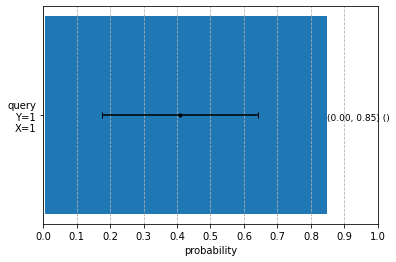

In [8]:
nd_Z = in_bnet.get_node_named("Z")
trol_list = []
unobs_nd_list = [nd_Z]
doX_bnet.set_trol_and_unobs_nodes(trol_list, unobs_nd_list)
checker = IdentifiabilityChecker(doX_bnet,
                          num_1world_samples=10000,
                          num_worlds=100)
for x_val in [0,1]:
    print("************************************************")
    doX_bnet.reset_x_val(x_val)
    checker.set_query_bds_and_stats()
    checker.print_query_bds_and_stats()
    Plotter_nz.plot_query_bds(doX_bnet.x_val,
        checker.get_query_bds(),
        zname_to_query_stats=checker.get_query_stats(),
        horizontal=True)

## No unobserved or control nodes

************************************************
world:
0, 1, 2
x_value= 0
control nodes: []
control coords to query bounds (low, high):
{(): array([0.644, 0.649])}
control coords to query statistics (mu, sigma):
{(): array([0.647, 0.002])}


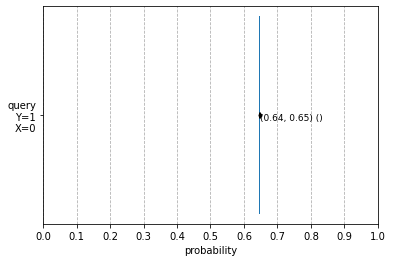

************************************************
world:
0, 1, 2
x_value= 1
control nodes: []
control coords to query bounds (low, high):
{(): array([0.382, 0.398])}
control coords to query statistics (mu, sigma):
{(): array([0.388, 0.007])}


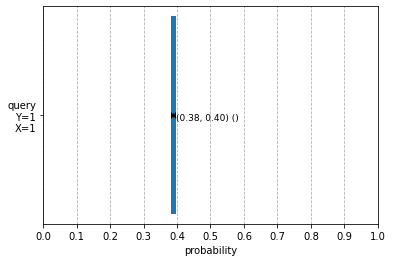

In [9]:
trol_list = []
unobs_nd_list = []
doX_bnet.set_trol_and_unobs_nodes(trol_list, unobs_nd_list)
checker = IdentifiabilityChecker(doX_bnet,
                          num_1world_samples=10000,
                          num_worlds=3)
for x_val in [0,1]:
    print("************************************************")
    doX_bnet.reset_x_val(x_val)
    checker.set_query_bds_and_stats()
    checker.print_query_bds_and_stats()
    Plotter_nz.plot_query_bds(doX_bnet.x_val,
        checker.get_query_bds(),
        zname_to_query_stats=checker.get_query_stats(),
        horizontal=True)

In [10]:
print_bdoor_prediction()

Backdoor Adjustment Formula prediction for query P(y|do(x))=
(x is row index, y is column index)
[[0.361 0.639]
 [0.638 0.362]]
